In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
#import seaborn as  sns 
import itertools
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('C:/Users/fitec/Downloads/2019INOUT_220419.csv', sep =',',nrows=None, na_values=r'\N')
df_copy = df.copy()

c:\users\fitec\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df.columns

Index(['location_accuracy', 'location_provider', 'misc_time_zone_id',
       'wifi_rssi', 'wifi_link_speed', 'wifi_frequency', 'network_type',
       'sensor_ambient_illuminance', 'sensor_ambient_pressure',
       'signal_strength_lte_cqi', 'sensor_geomagnetic_x',
       'sensor_geomagnetic_y', 'sensor_geomagnetic_z',
       'signal_strength_lte_rsrp', 'sound_level', 'sensor_proximity',
       'sensor_accelerometer_x', 'sensor_accelerometer_y',
       'sensor_accelerometer_z', 'location_speed', 'speed_in_cell',
       'time_in_cell', 'meta_indoor', 'meta_indoor_probability',
       'meta_outdoor_probability', 'training_tag'],
      dtype='object')

In [24]:
df.head()

,location_accuracy,location_provider,misc_time_zone_id,wifi_rssi,wifi_link_speed,wifi_frequency,network_type,sensor_ambient_illuminance,sensor_ambient_pressure,signal_strength_lte_cqi,...,sensor_accelerometer_x,sensor_accelerometer_y,sensor_accelerometer_z,location_speed,speed_in_cell,time_in_cell,meta_indoor,meta_indoor_probability,meta_outdoor_probability,training_tag
0,42.500,network,America/Sao_Paulo,-77.0,43.0,2462.0,HSPA,0.0,NaN,NaN,...,-2.749710,-1.196930,9.206192,0.000000,NaN,NaN,1.0,0.897859,0.102141,NaN
1,26.885,network,America/Sao_Paulo,NaN,NaN,NaN,Unknown,0.0,NaN,0.0,...,-9.602875,0.707230,-1.873291,0.000000,NaN,NaN,1.0,0.938019,0.061981,NaN
2,10.000,gps,America/Sao_Paulo,NaN,NaN,NaN,Unknown,10.0,NaN,NaN,...,-1.417000,1.647000,9.098000,0.073091,NaN,NaN,0.0,0.369782,0.630218,NaN
3,10.000,gps,America/Sao_Paulo,NaN,NaN,NaN,Unknown,2.0,NaN,NaN,...,-10.056000,-2.470000,1.781000,0.000000,NaN,NaN,0.0,0.099714,0.900286,NaN
4,92.865,network,America/Sao_Paulo,-63.0,11.0,2412.0,LTE,333.0,NaN,NaN,...,0.047884,0.416591,9.878476,0.000000,NaN,NaN,1.0,0.980363,0.019637,NaN


In [25]:
df.dtypes

location_accuracy             float64
location_provider              object
misc_time_zone_id              object
wifi_rssi                     float64
wifi_link_speed               float64
wifi_frequency                float64
network_type                   object
sensor_ambient_illuminance    float64
sensor_ambient_pressure       float64
signal_strength_lte_cqi       float64
sensor_geomagnetic_x          float64
sensor_geomagnetic_y          float64
sensor_geomagnetic_z          float64
signal_strength_lte_rsrp      float64
sound_level                   float64
sensor_proximity              float64
sensor_accelerometer_x        float64
sensor_accelerometer_y        float64
sensor_accelerometer_z        float64
location_speed                float64
speed_in_cell                 float64
time_in_cell                  float64
meta_indoor                   float64
meta_indoor_probability       float64
meta_outdoor_probability      float64
training_tag                   object
dtype: objec

In [14]:
df.isnull().sum(axis = 0)

location_accuracy                    0
location_provider                    0
misc_time_zone_id                    0
wifi_rssi                      8226763
wifi_link_speed                8345922
wifi_frequency                 8552563
network_type                    567018
sensor_ambient_illuminance     5396557
sensor_ambient_pressure       19540473
signal_strength_lte_cqi       13533402
sensor_geomagnetic_x           9847286
sensor_geomagnetic_y           9847286
sensor_geomagnetic_z           9847286
signal_strength_lte_rsrp      16759048
sound_level                   14455209
sensor_proximity                161192
sensor_accelerometer_x            1572
sensor_accelerometer_y            4156
sensor_accelerometer_z            2536
location_speed                       0
speed_in_cell                 15937189
time_in_cell                  15937409
meta_indoor                    1254253
meta_indoor_probability        1249882
meta_outdoor_probability       1249882
training_tag             

In [4]:
df.drop(['training_tag', 'signal_strength_lte_rsrp', 'time_in_cell', 'sensor_ambient_pressure', 'signal_strength_lte_cqi'],
        axis=1, inplace=True)

In [5]:
df.dropna(inplace=True)

In [6]:
df = df[(df['meta_indoor_probability']>0.7)|(df['meta_outdoor_probability']>0.7)]

In [7]:
df['meta_indoor'].value_counts()

1.0    2451704
0.0      14021
Name: meta_indoor, dtype: int64

In [8]:
g = df.groupby('meta_indoor')
g.size().min()
g = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
df = g.reset_index(drop=True)
df['meta_indoor'].value_counts()

1.0    14021
0.0    14021
Name: meta_indoor, dtype: int64

In [9]:
df.drop(['meta_indoor_probability','meta_outdoor_probability', 'misc_time_zone_id'], axis=1, inplace=True)

In [10]:
def categorical_toNumerical(y):
    enconder_output = preprocessing.LabelEncoder()
    a_str = y.astype('str')
    enconder_output.fit(a_str)
    categorical_to_numerical = enconder_output.transform(a_str)
    return(categorical_to_numerical)

In [40]:
df.dtypes

location_accuracy             float64
location_provider              object
misc_time_zone_id              object
wifi_rssi                     float64
wifi_link_speed               float64
wifi_frequency                float64
network_type                   object
sensor_ambient_illuminance    float64
sensor_geomagnetic_x          float64
sensor_geomagnetic_y          float64
sensor_geomagnetic_z          float64
sound_level                   float64
sensor_proximity              float64
sensor_accelerometer_x        float64
sensor_accelerometer_y        float64
sensor_accelerometer_z        float64
location_speed                float64
speed_in_cell                 float64
meta_indoor                   float64
dtype: object

In [16]:
df['network_type'] = categorical_toNumerical(df['network_type'])
df['location_provider'] = categorical_toNumerical(df['location_provider'])

In [48]:
from sklearn import preprocessing



In [49]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000539,0.0,0.217391,0.073988,0.01465,0.375,0.000180,0.361535,0.661772,0.240250,1.000000,0.01,0.574595,0.786125,0.371160,0.000000,0.0,0.0
1,0.005363,0.0,0.423913,0.109827,0.00000,0.750,0.000081,0.387088,0.587135,0.245574,0.920324,0.05,0.769937,0.636731,0.377217,0.000000,0.0,0.0
2,0.000539,0.0,0.217391,0.073988,0.01465,0.375,0.000180,0.361535,0.661772,0.240250,1.000000,0.01,0.574595,0.786125,0.371160,0.000000,0.0,0.0
3,0.000535,0.0,0.217391,0.023121,0.01465,0.750,0.000000,0.359850,0.647405,0.245320,0.527264,0.08,0.544464,0.805612,0.213360,0.014438,0.0,0.0
4,0.000599,0.0,0.630435,0.061272,0.00000,0.625,0.000000,0.384493,0.518925,0.229842,0.733213,0.08,0.540234,0.790589,0.376424,0.007976,0.0,0.0


In [51]:
X = df.drop('meta_indoor', axis=1)
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
y = df['meta_indoor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['meta_indoor'] not found in axis"

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.head()

,location_accuracy,location_provider,wifi_rssi,wifi_link_speed,wifi_frequency,network_type,sensor_ambient_illuminance,sensor_geomagnetic_x,sensor_geomagnetic_y,sensor_geomagnetic_z,sound_level,sensor_proximity,sensor_accelerometer_x,sensor_accelerometer_y,sensor_accelerometer_z,location_speed,speed_in_cell
12281,11.000,0,-73.0,43.0,2417.0,6,1.0,-57.8125,15.1875,44.000,33.06425,1.0,-0.555455,0.450110,-10.381260,0.0,0.0
3335,5.400,0,-72.0,65.0,2462.0,3,23.0,-16.2500,29.7500,-2.750,90.30873,1.0,0.708000,8.236000,4.099000,0.0,0.0
4456,5.400,0,-72.0,65.0,2462.0,3,23.0,-16.2500,29.7500,-2.750,90.30873,1.0,0.708000,8.236000,4.099000,0.0,0.0
4609,12.000,0,-40.0,72.0,2462.0,3,26.0,-6.5625,5.8125,6.125,84.83790,100.0,0.440533,8.571242,4.663905,0.0,0.0
21411,21.346,1,-71.0,65.0,2412.0,3,34.0,-16.2500,29.5000,-2.750,70.98988,1.0,-0.019000,-0.249000,9.634000,0.0,0.0


c:\users\fitec\appdata\local\programs\python\python37\lib\site-packages\yellowbrick\features\rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
c:\users\fitec\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


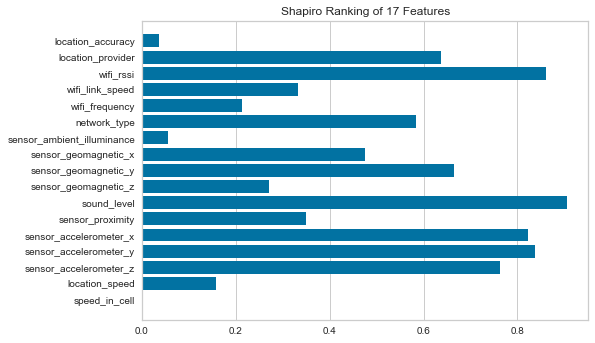

In [19]:
from yellowbrick.features import Rank1D

# # Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=X_train.columns, algorithm='shapiro')

visualizer.fit(X_train, y_train)                # Fit the data to the visualizer
visualizer.transform(X_train)             # Transform the data
visualizer.poof()   

In [37]:
def clusterize(X, n):
    from sklearn import cluster
    agglo = cluster.FeatureAgglomeration(n_clusters = n)
    agglo.fit(X) 
    X_reduced = agglo.transform(X)
    return(X_reduced)

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
kmeans = KMeans(n_clusters=2, random_state=1).fit(X_train)
print (np.unique(y_test))

predicao = kmeans.predict(X_test)
accuracy_score(predicao, y_test)
# kmeans.cluster_centers_
len(X_test)

[0. 1.]


5609

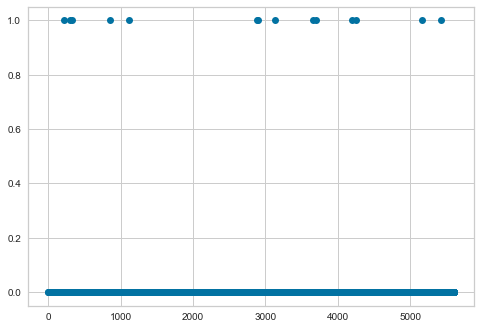

In [44]:
plt.plot(predicao, 'o')
plt.show()